# Make a summary of the bouts of a bird (alsa for now), curated and non-curated
- Make a df of all the files, days, (auto, curated)
- Load all the files (exclude the raw, spectrogram)
- Get the timestamps for each
- Plot spectrograms by day, and within day

In [1]:
import os
import glob
import socket
import logging
import pickle
import numpy as np
import pandas as pd

from importlib import reload

logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

logger.info('Running on {}'.format(socket.gethostname()))

2022-12-29 01:56:38,463 root         INFO     Running on pakhi.ucsd.edu


In [2]:
from ceciestunepipe.file import bcistructure as et
from ceciestunepipe.util.sound import boutsearch as bs
from ceciestunepipe.pipeline import searchbout as sb

In [3]:
reload(et)
sess_par = {'bird': 's_b1555_22',
           'acq_software': 'alsa',
           'derived_folder': 'bouts_ceciestunepipe',
           'auto_file': 'bout_auto_file',
           'curated_file': 'bout_curated_file',
           'super_session': 'all-sess-01' # where to load/save the bouts summary file in the processed_data folder
           }

In [4]:
spd = sb.get_bird_sess_pd(sess_par)
spd.head()

2022-12-29 01:56:47,990 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-16/alsa/bouts_ceciestunepipe
2022-12-29 01:56:47,994 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-18/alsa/bouts_ceciestunepipe
2022-12-29 01:56:48,003 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-24/alsa/bouts_ceciestunepipe
2022-12-29 01:56:48,071 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-05-13/alsa/bouts_ceciestunepipe
2022-12-29 01:56:48,091 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-05-23/alsa/bouts_ceciestunepipe
2022-12-29 01:56:48,128 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file

,sess,acq_soft,has_auto_bouts,has_curated_bouts
0,2022-03-25,alsa,True,False
1,2022-03-26,alsa,True,False
2,2022-03-27,alsa,True,True
3,2022-03-28,alsa,True,True
4,2022-03-29,alsa,True,True


In [61]:
reload(sb)
bout_meta_pd, all_bout_pd = sb.load_all_bouts(sess_par)

2022-12-28 23:31:32,492 ceciestunepipe.pipeline.searchbout INFO     Looking for all sessions with bouts detected/curated for bird s_b1555_22
2022-12-28 23:31:32,514 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-16/alsa/bouts_ceciestunepipe
2022-12-28 23:31:32,516 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-18/alsa/bouts_ceciestunepipe
2022-12-28 23:31:32,522 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-24/alsa/bouts_ceciestunepipe
2022-12-28 23:31:32,536 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-05-13/alsa/bouts_ceciestunepipe
2022-12-28 23:31:32,544 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/deriv

In [47]:
all_bout_pd.head(2)

,start_ms,end_ms,start_sample,end_sample,rms_p,peak_p,bout_auto,file,len_ms,syl_in,...,valid_waveform,valid,sess,t_stamp,is_call,confusing,bout_check,datetime,day,hour
0,1009080,1012925,48435840,48620400,1.557602,21.889159,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,3845,"[[1009080, 1009145], [1009205, 1009235], [1010...",...,True,True,2022-03-25,2022-03-25 16:46:50.080,NaN,NaN,NaN,2022-03-25 16:46:50.080,2022-03-25,16
1,1047765,1053860,50292720,50585280,1.557602,23.138117,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,6095,"[[1047765, 1047825], [1049565, 1049630], [1051...",...,True,True,2022-03-25,2022-03-25 16:47:28.765,NaN,NaN,NaN,2022-03-25 16:47:28.765,2022-03-25,16


In [85]:
reload(sb)
sb.save_bouts_summary(spd, all_bout_pd, sess_par['bird'],
                      sess=sess_par['super_session'],
                      acq_soft=sess_par['acq_software'],
                      derived_folder=sess_par['derived_folder'])

2022-12-29 01:42:58,436 ceciestunepipe.pipeline.searchbout INFO     Saving bout summary dataframe
2022-12-29 01:42:58,437 ceciestunepipe.pipeline.searchbout INFO     Meta, bout summary path is /mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_meta_df.pickle, /mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_summary_df.pickle


('/mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_meta_df.pickle',
 '/mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_summary_df.pickle')

In [5]:
abmdf2, abdf = sb.load_bouts_summary(sess_par['bird'],
                      sess=sess_par['super_session'],
                      acq_soft=sess_par['acq_software'],
                      derived_folder=sess_par['derived_folder'])

2022-12-29 01:57:00,618 ceciestunepipe.pipeline.searchbout INFO     Loading bout summary dataframe
2022-12-29 01:57:00,620 ceciestunepipe.pipeline.searchbout INFO     Meta, bout summary path is /mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_meta_df.pickle, /mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_summary_df.pickle


In [12]:
list(abmdf2['sess'][:5])

['2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29']

In [35]:
#### make a meta df with a few sessions to test the load bouts
some_meta_pd = abmdf2[abmdf2['sess'].isin(list(abmdf2['sess'][:200]))]
some_meta_pd

,sess,acq_soft,has_auto_bouts,has_curated_bouts
0,2022-03-25,alsa,True,False
1,2022-03-26,alsa,True,False
2,2022-03-27,alsa,True,True
3,2022-03-28,alsa,True,True
4,2022-03-29,alsa,True,True
...,...,...,...,...
195,2022-10-08,alsa,True,True
196,2022-10-09,alsa,True,True
197,2022-10-10,alsa,True,False
198,2022-10-11,alsa,True,True


In [36]:
reload(sb)
some_meta_pd, some_bout_pd = sb.load_all_bouts(sess_par, meta_pd=some_meta_pd)

2022-12-29 08:04:54,944 ceciestunepipe.pipeline.searchbout INFO     Looking for all sessions with bouts detected/curated for bird s_b1555_22
2022-12-29 08:04:54,946 ceciestunepipe.pipeline.searchbout INFO     Will only do sessions ['2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18'

In [45]:
reload(sb)
all_meta_pd, all_bout_pd = sb.update_bouts(sess_par)

2022-12-29 10:09:19,018 ceciestunepipe.pipeline.searchbout INFO     Looking for all sessions with bouts detected/curated for bird s_b1555_22
2022-12-29 10:09:19,019 ceciestunepipe.pipeline.searchbout INFO     Loading bout summary dataframe
2022-12-29 10:09:19,020 ceciestunepipe.pipeline.searchbout INFO     Meta, bout summary path is /mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_meta_df.pickle, /mnt/sphere/speech_bci/processed_data/s_b1555_22/all-sess-01/alsa/bouts_ceciestunepipe/bout_summary_df.pickle
2022-12-29 10:09:19,299 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-16/alsa/bouts_ceciestunepipe
2022-12-29 10:09:19,303 ceciestunepipe.pipeline.searchbout INFO     Search/bouts file not found in /mnt/sphere/speech_bci/derived_data/s_b1555_22/2022-04-18/alsa/bouts_ceciestunepipe
2022-12-29 10:09:19,313 ceciestunepipe.pipeline.searchbout INFO     Search/bouts 

In [37]:
some_meta_pd

,sess,acq_soft,has_auto_bouts,has_curated_bouts
0,2022-03-25,alsa,True,False
1,2022-03-26,alsa,True,False
2,2022-03-27,alsa,True,True
3,2022-03-28,alsa,True,True
4,2022-03-29,alsa,True,True
...,...,...,...,...
195,2022-10-08,alsa,True,True
196,2022-10-09,alsa,True,True
197,2022-10-10,alsa,True,False
198,2022-10-11,alsa,True,True


In [34]:
some_meta_pd[(some_meta_pd['has_auto_bouts'] == True)].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            219, 220, 221, 222, 223, 224, 225, 226, 227, 228],
           dtype='int64', length=213)

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='datetime'>

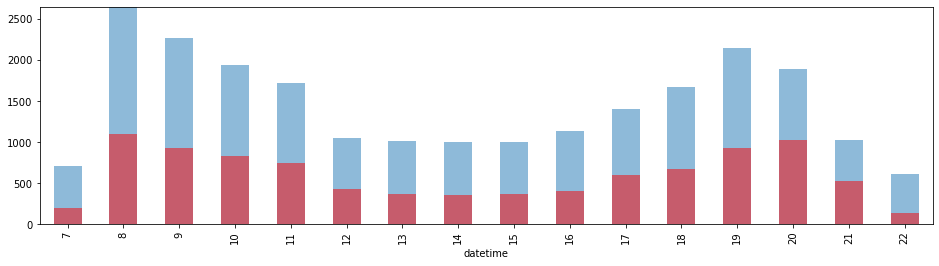

In [54]:
fig, axs = plt.subplots(figsize=(16, 4))
all_bout_pd['bout_check'].fillna(False, inplace=True)
all_bout_pd.groupby(all_bout_pd['datetime'].dt.hour)['bout_auto'].sum().plot(kind='bar', ax=axs, alpha=0.5)
all_bout_pd.groupby(all_bout_pd['datetime'].dt.hour)['bout_check'].sum().plot(kind='bar', ax=axs, alpha=0.5, color='red')

<AxesSubplot:xlabel='datetime'>

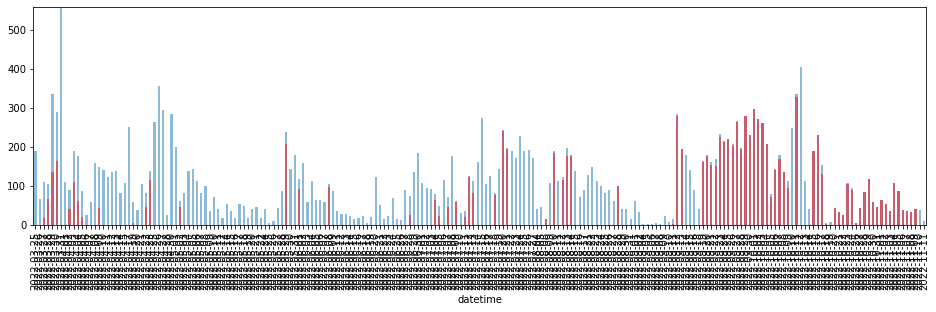

In [55]:
fig, axs = plt.subplots(figsize=(16, 4))
all_bout_pd['bout_check'].fillna(False, inplace=True)
all_bout_pd.groupby(all_bout_pd['datetime'].dt.date)['bout_auto'].sum().plot(kind='bar', ax=axs, alpha=0.5)
all_bout_pd.groupby(all_bout_pd['datetime'].dt.date)['bout_check'].sum().plot(kind='bar', ax=axs, alpha=0.5, color='red')